# Likelihood Ratio Tests

Resources:
- https://towardsdatascience.com/the-most-important-statistical-test-dee01f4d50cf
- https://stats.stackexchange.com/questions/599102/deriving-the-likelihood-ratio-test-statistic-for-a-normal-distribution-with-unkn
- https://online.stat.psu.edu/stat415/book/export/html/847


# Introduction

The likelihood ratio (LTR) "unifies" frequentist statistical tests. The t-test, F-test, chi-squared test, and so on are *specific* cases (or even approximations) of the LRT.

According to Wikipedia, suppose we have a statistical model with parameter space $\Theta$. A nulll hypothesis is often stated by saying that the parameter $\theta$ lies in a specified subset $\Theta_0$ of $\Theta$. The alternative hypothesis is thus that $\theta$ lies in the complement of $\Theta_0$. The likelihood ratio test statistic for the null hypothesis

$$H_0:\theta\in\Theta_0$$ is given by:
$$\Delta D=\lambda_{LR}=-2\ln\left[\frac{\sup_{\theta\in\Theta_0}\mathcal{L}(\theta)}{\sup_{\theta\in\Theta}\mathcal{L}(\theta)}\right]$$

Inside the bracket is the likelihood ratio, and the ratio is bounded between zero and one.

Often, the likelihood-ratio test statistic is expressed as a difference between the log-likelihoods

$$\lambda_{LR}=-2\left[\ell(\theta_0)-\ell(\hat\theta)\right]$$

where $\ell(\hat\theta)\equiv\ln\left[\sup_{\theta\in\Theta}\mathcal{L}(\theta)\right]$, the logarithm of the *maximized* likelihood function $\ell$, or in other words, value of the likelihood using the parameter $\theta$ that maximizes it.

Multiplying by -2 ensures mathematically by the Wilks' theorem that $\lambda_{LR}$ converges asymptotically to being $\chi^2$-distributed if the null hypothesis is true. (with degrees of freedom (df) equal to the difference in df between the two models). This aamzing fact enables the majority of hypothesis testing.

The use of the LTR is justified by the Neyman-Pearson lemma, which states that the LRT is the most powerful test to compare two simple hypotheses (e.g., $H_0:\theta=0, H_a:\theta=2$).

Because the alternative hypothesis of interest is usually not simple, we instead want things like $\theta\neq 0$, we use MLE to reduce it to a simple one such as $\theta=2$. This is done through (generalized) linear regression. Intuitively, if we cannot reject the null hypothesis at the MLE, then we cannot possibly reject at any other point, so the MLE is the only point that matters.

# Connection to the $F$-Test

First as a reminder, an F-test is any statistical test used to compare the variances of two samples or the ratio of variance between multiple samples.

Here are some common examples of how F-tests are used:
- The hypothesis that the means of a given set (potentially more than 2) of normally distributed populations, all having the same standard deviation, are equal. This is the best-known F-test, playing an important role in ANOVA.
  - F test of ANOVA follows 3 assumptions:
    1. Normality
    2. Homogeneity of variance
    3. Independence of errors and random sampling
- The hypothesis that a proposed regression model fits the data well.
- The hypothesis that a data set in a regression analysis follows the simpler of two proposed linear models are nested within each other
- Multiple-comparison testing is conducted using needed data in already completed F-test, if F-test leads to rejection of null and the factor under study has animpact on the dependent variable.

> Now back to the article...

We are essentially comparing two models; one with a constraint and one with a relaxation of the constraint, often expressed as:

$$H_0:\mu=0$$
$$H_a:\mu\neq 0$$

In the null model, we constrain the mean to be 0. In the alternative, we allow it to be nonzero. We then need to specify a likelihood function.

For now we assume that the observations come from a normal distribution with known variance $\sigma^2=1$

> hopefully the article later explores the realistic case that you don't know that it's a normal distribution...

The MLE is the sample mean. Thus:

$$\Delta D=-2\ln\left(\frac{\prod_{i=1}^N\frac{1}{\sqrt{2\pi}}e^{-\frac{x_i^2}{2}}}{\prod_{i=1}^N\frac{1}{\sqrt{2\pi}}e^{-\frac{(x_i-\bar x)^2}{2}}}\right)$$

trust that this equals:

$$=\left(\sum_{i=1}^Nx_i^2\right)-\left(\sum_{i=1}^N(x_i-\bar x)^2\right)$$

through some neat algebra.

This looks familiar - the regression sum of squares (SS). The $\chi^2$-distribution is defined as the SS from a standard normal distribution so this makes sense. Since the alternative model has one extra parameter, there is 1 df in the $\chi^2$-distribution.

If the variance is unknown, the null model estimates one paramter and alternative model estimates two, so the df is still 1. This formulation is more commonly known as the ANOVA or F-test, which in this example is equivalent to the t-test on the intercept.

The article then offers some R code to demonstrate this equivalence. Let's do it here in Python instead:

In [4]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

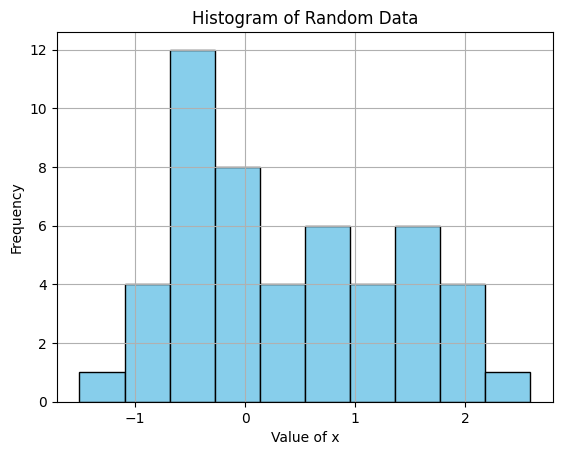

In [6]:
# generate some random normal data
## mean of 0.5, standard deviation of 1, and 50 samples
x = np.random.normal(loc=0.5, scale = 1, size = 50)

# Plot histogram
plt.hist(x, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Value of x')
plt.ylabel('Frequency')
plt.title('Histogram of Random Data')
plt.grid(True)
plt.show()

In [18]:
# Fit models

## model without intercept
model0 = sm.OLS(x,np.zeros_like(x)).fit()

## model with intercept
model1 = sm.OLS(x, sm.add_constant(np.ones_like(x))).fit()

# perform ANOVA
anova_table = sm.stats.anova_lm(model0, model1)

# model summary
model1_summary = model1.summary()

# one-sample t-test
t_test_result = stats.ttest_1samp(x, 0)

print(anova_table)
print(model1_summary)
print(t_test_result)

   df_resid        ssr  df_diff   ss_diff         F   Pr(>F)
0      50.0  53.824539      0.0       NaN       NaN      NaN
1      49.0  46.480498      1.0  7.344041  7.742128  0.00764
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                nan
Time:                        02:40:00   Log-Likelihood:                -69.122
No. Observations:                  50   AIC:                             140.2
Df Residuals:                      49   BIC:                             142.2
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    st

# Connection to the $G$-Test

Other than testing sample means, we often want to test for independence in contingency tables.

> isn't this a special case of testing sample means though? at least in the 2x2 case, this is a test of two proportions

Most would immediately jump to the Pearson's $\chi^2$-Test, which is an approximation of the G-test, which is a specific case of LRT. The G-test should be default, but the Chi-Squared is more well known. Fisher's Exact Test provides exact $p$-values instead of relying on asymptotics but the factorials make it computationally impractical for large sample sizes.

Take the following contingency table:

|       | $y_{.1}$ | $y_{.2}$ |
|-------|----------|----------|
| $y_{1.}$ | $y_{11}$ | $y_{12}$ |
| $y_{2.}$ | $y_{21}$ | $y_{22}$ |

where $y_{11}+y_{12}+y_{21}+y_{22}=N$.

What is the likelihood? Under independence, we can think of the data as being generated from a multinomial distribution (a generalization of the binomial distribution) where the probability of falling in each cell is

$$\pi_{ij}=\frac{y_{i.}}{N}\times\frac{y_{.j}}{N}$$

With dependence, the probability of falling in each cell is

$$\mu_{ij}=\frac{y_{ij}}{N}$$

Using that, we can construct our likelihood functions and eventually, with some algebra, arrive at

$$\Delta D=2\sum_i\sum_jy_{ij}\ln\left(\frac{\mu_{ij}}{\pi_{ij}}\right)$$

Now the article claims that we can also alternatively easily perform this test using Poisson regression:'y ~ x1+x2' against ' y~ x1+x2+x1*x2'.

When all the $\pi N$ are large, Chi-Squared and G-test yield similar $p$-values. The $G$-test should be preferable because the LRT is the most powerful test and the distribution of the test statistic more closely matches the $\chi^2$-distribution.

# How to Perform LRT?

The general procedure for LRT is - we fit a simpler regression model and compare the deviance against a more complex model.

1. Compute the maximum log likelihood under the constrained null model
2. Compute the maximum log likelihood when the constraint is relaxed
3. Compare $\Delta D$ against the $\chi^2$-distribution with the appropriate df to get the $p$-value

The model in 1) has to be *nested* under 2).